# FINAL PROJECT

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# MULTIVARIATE ANALYSIS

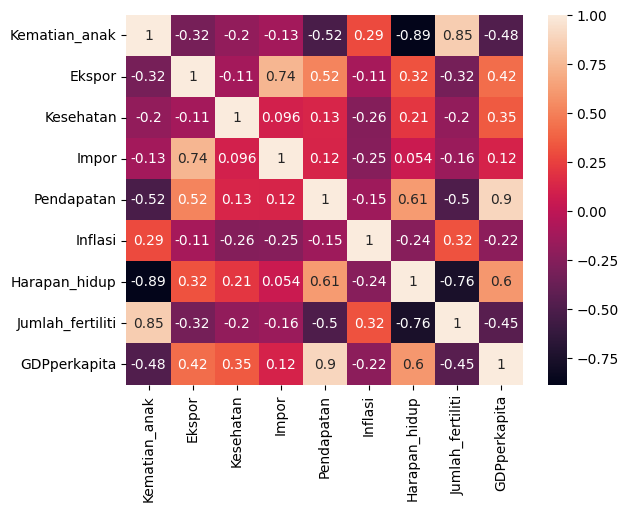

In [8]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2g')
plt.show()

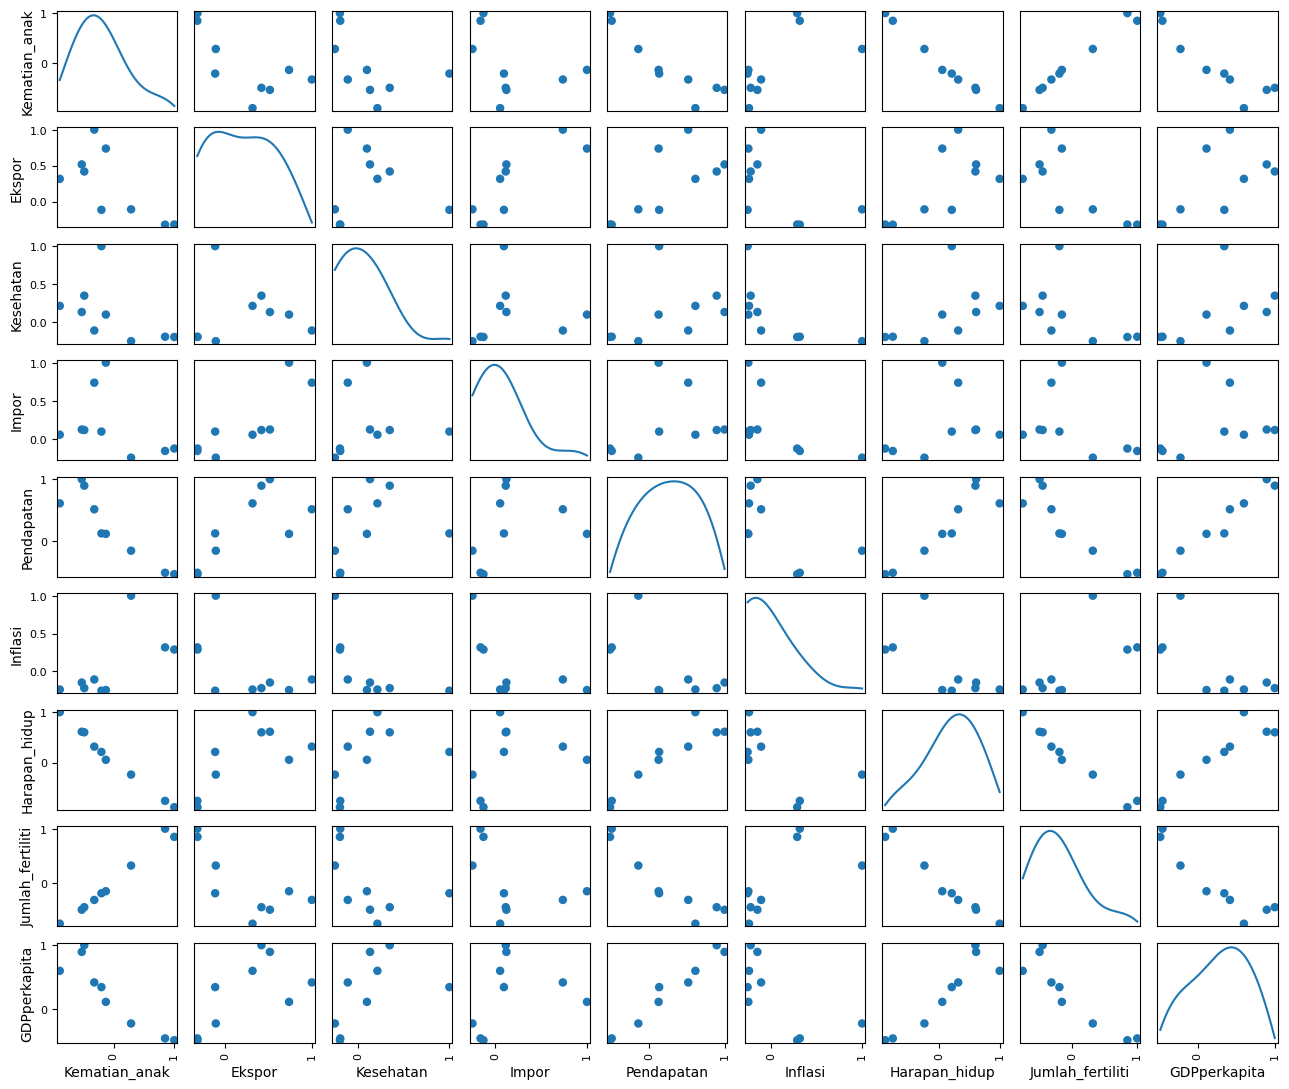

In [41]:
pd.plotting.scatter_matrix(numeric_df.corr(), alpha = 1, diagonal = 'kde', figsize = (13,11),s =150)
plt.tight_layout()
plt.show()

# FEATURE SELECTION

Dari multivariate analysis menggunakan heatmap, dapat terlihat korelasi-korelasi antara feature. Disini akan menggunakan feature Pendapatan dan Kematian_anak yang memiliki korelasi negatif sebesar -0.52. Hal tersebut dipilih karena menyesuaikan deskripsi soal untuk mengkategorikan negara berdasarkan faktor sosial ekonomi dan kesehatan, lalu korelasi yang dimiliki juga cukup besar dibandingkan korelasi antara faktor sosial ekonomi dengan kesehatan yang lain.

# DATA CLEANING

# 1. MISSING VALUE

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [43]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [44]:
# Finding Missing Value
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Berdasarkan .info(), .describe(), dan .isnull.sum(), tidak ditemukan adanya missing values yang terdapat pada data. Karena dapat dilihat pada .isnull().sum() yang setiap kolomnya bernilai 0. Sehingga tidak diperlukan handling missing values.

# 2. OUTLIERS

In [45]:
# Finding Outlier
def finding_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[((df<(Q1-1.5*IQR))|(df > (Q3 + 1.5*IQR)))]
    return df_final


In [46]:
# Get Outliers
print("\nPendapatan: ",finding_outlier_IQR(df['Pendapatan']))
print("\nKematian_anak: ",finding_outlier_IQR(df['Kematian_anak']))


Pendapatan:  23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64

Kematian_anak:  31     149.0
32     150.0
66     208.0
132    160.0
Name: Kematian_anak, dtype: float64


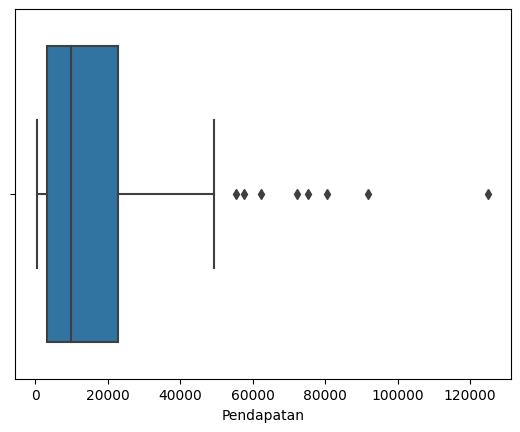

In [47]:
sns.boxplot(x='Pendapatan', data=df)
plt.show()

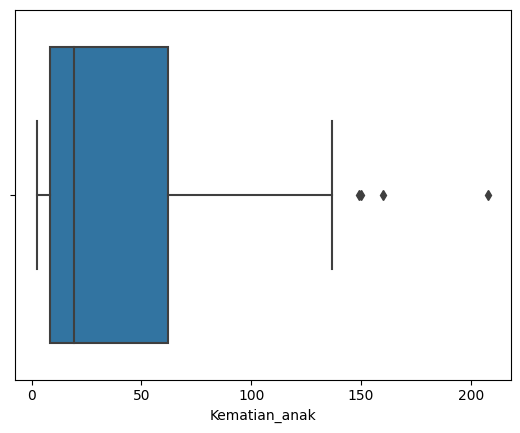

In [48]:
sns.boxplot(x='Kematian_anak', data=df)
plt.show()

In [49]:
# Handling Outlier

def remove_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]
    return df_final

In [50]:
df_outlier_removed = remove_outlier_IQR(df[['Pendapatan', 'Kematian_anak']])
df_outlier_removed.dropna(axis=0, inplace=True)

In [51]:
df_outlier_removed

,Pendapatan,Kematian_anak
0,1610.0,90.2
1,9930.0,16.6
2,12900.0,27.3
3,5900.0,119.0
4,19100.0,10.3
...,...,...
162,2950.0,29.2
163,16500.0,17.1
164,4490.0,23.3
165,4480.0,56.3


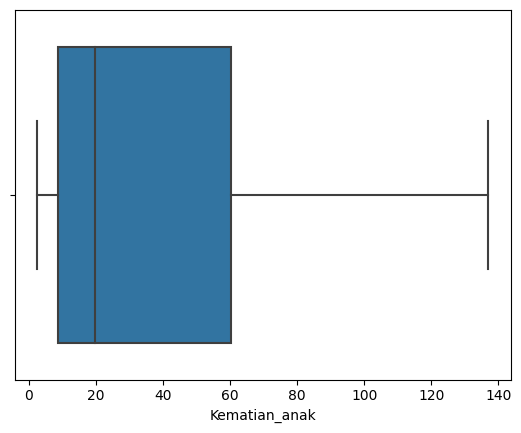

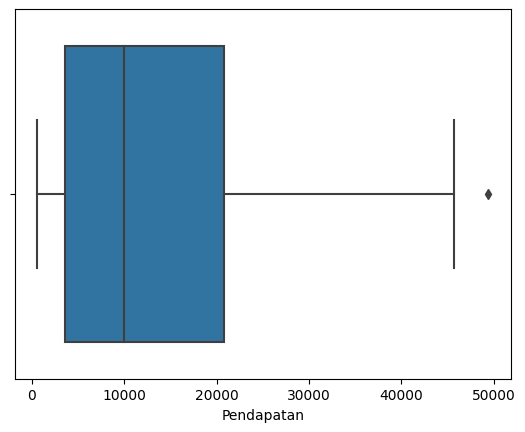

In [52]:
sns.boxplot(x='Kematian_anak', data=df_outlier_removed)
plt.show()

sns.boxplot(x='Pendapatan', data=df_outlier_removed)
plt.show()


# UNIVARIATE ANALYSIS

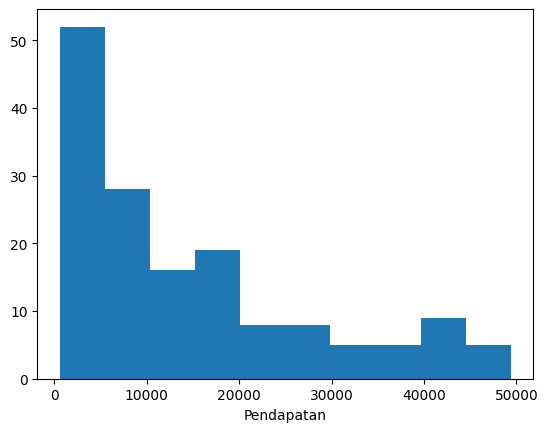

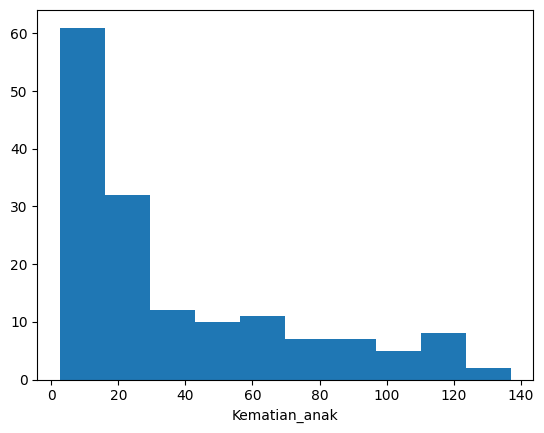

In [53]:
fig, ax= plt.subplots()
ax.hist(df_outlier_removed['Pendapatan'])
ax.set_xlabel('Pendapatan')
plt.show()

fig, ax= plt.subplots()
ax.hist(df_outlier_removed['Kematian_anak'])
ax.set_xlabel('Kematian_anak')
plt.show()

Jumlah Pendapatan terbanyak berada pada kisaran 1-2500

Jumlah Kematian_anak terbanyak berada pada kisaran 1-15

# BIVARIATE ANALYSIS

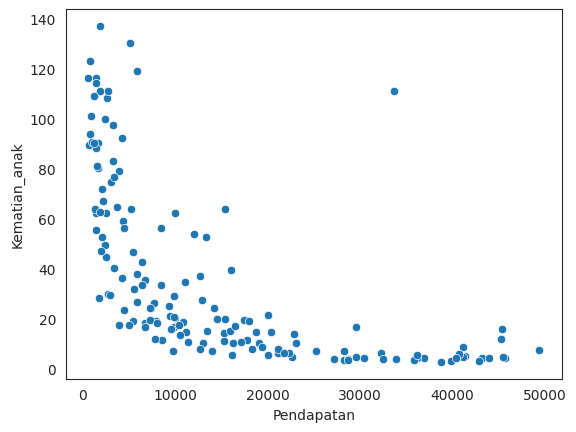

In [54]:
with sns.axes_style(style='white'):
    scatter_plt= sns.scatterplot(x='Pendapatan',y='Kematian_anak',data=df_outlier_removed)

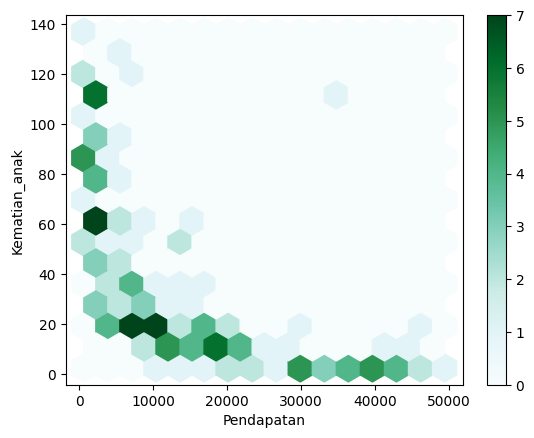

In [55]:
df_outlier_removed.plot.hexbin(x='Pendapatan', y='Kematian_anak', gridsize=15)
plt.show()

Dari plot di atas menunjukkan banyak negara yang berada di rentang nilai Pendapatan 0-20000 dan Kematian Anak sebesar 0-120

# CLUSTERING

In [56]:
# Scaling Data
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_removed.astype(float))
dfoutlier_std

array([[-0.97531632,  1.51906422],
       [-0.34266015, -0.56653887],
       [-0.11682014, -0.26333298],
       [-0.64910298,  2.33516977],
       [ 0.35463038, -0.74506196],
       [ 0.32421421, -0.62604656],
       [-0.58827066, -0.52403337],
       [ 2.05033143, -0.90091545],
       [ 2.18720416, -0.91508395],
       [ 0.11890512,  0.0738773 ],
       [ 0.64358392, -0.64588246],
       [ 2.02751931, -0.79323486],
       [-0.91220279,  0.36291468],
       [ 0.06567683, -0.63454766],
       [ 0.1341132 , -0.88107955],
       [ 2.02751931, -0.90941655],
       [-0.49854298, -0.50419747],
       [-0.95934784,  2.10847379],
       [-0.60956197,  0.17305679],
       [-0.68636278,  0.28357109],
       [-0.35862863, -0.84140775],
       [-0.08640398,  0.45075938],
       [ 0.00484451, -0.47586047],
       [ 0.06567683, -0.73089346],
       [-0.9890036 ,  2.25015878],
       [-1.03964651,  1.61541001],
       [-0.90611955,  0.22122969],
       [-0.8954739 ,  2.02346279],
       [ 1.99710315,

In [57]:
#Clustering with KMeans k = 2
kmeans1 = KMeans(n_clusters = 2, random_state = 42, n_init= 10).fit(dfoutlier_std)
labels1 = kmeans1.labels_

In [58]:
new_dfoutlier_std = pd.DataFrame(data =dfoutlier_std, columns= ['Pendapatan', 'Kematian_anak'])
new_dfoutlier_std['label_kmeans1'] = labels1

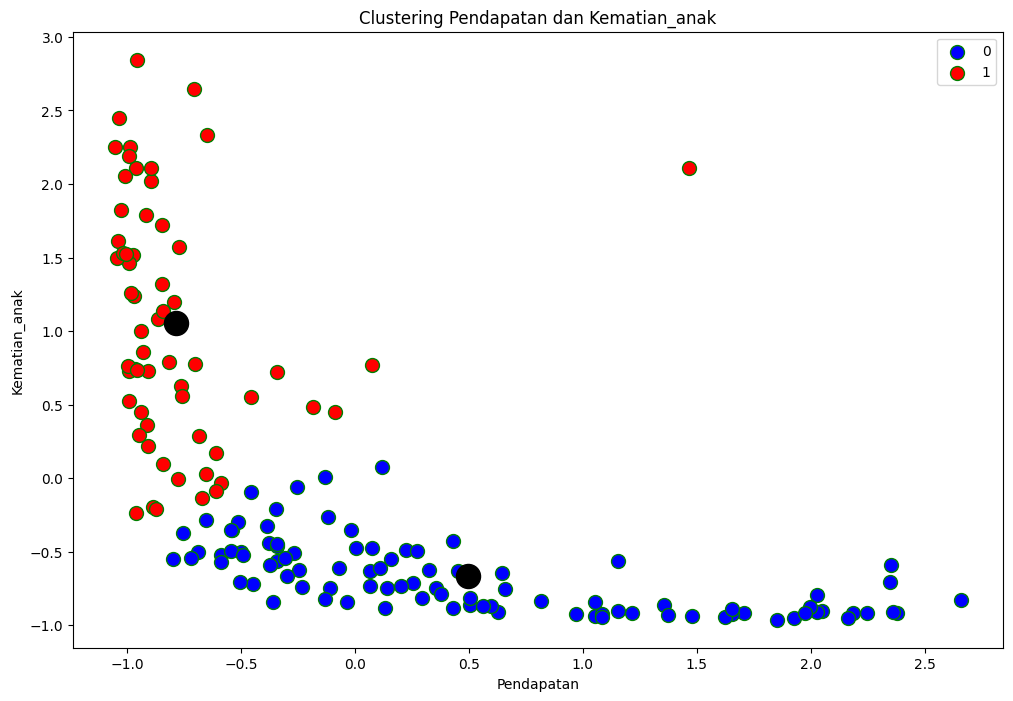

In [59]:
# Visualisasi Cluster k=2
plt.figure(figsize=(12,8))
plt.scatter(new_dfoutlier_std.Pendapatan[new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans1 == 0], c='blue', edgecolor='green', s=100, ls='-', label= 0)
plt.scatter(new_dfoutlier_std.Pendapatan[new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans1 == 1], c='red', edgecolor='green', s=100, ls='-', label = 1)

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300)
plt.xlabel('Pendapatan')
plt.ylabel('Kematian_anak')
plt.legend()
plt.title('Clustering Pendapatan dan Kematian_anak')
plt.show()

[309.9999999999999, 140.00033623897522, 59.98596841448345, 40.32440226213866, 28.693214690801263, 23.2135237286015, 18.08346694492132, 14.097611194202024, 12.092836579790466, 9.908858718653613]


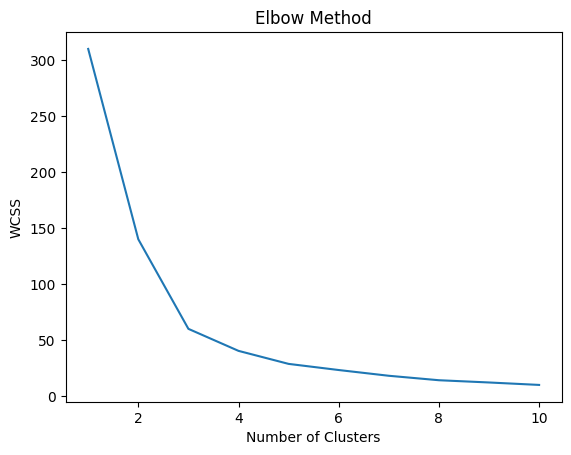

In [60]:
# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state = 42, n_init=10)
    kmeans.fit(dfoutlier_std)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Dari grafik Elbow Method, direkomendasikan untuk mengunakan k = 3 (number of cluster)

In [61]:
#Clustering with KMeans k = 3
kmeans2 = KMeans(n_clusters = 3, random_state = 42, n_init= 10).fit(dfoutlier_std)
labels2 = kmeans2.labels_
labels2

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2,
       2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2,
       2], dtype=int32)

In [62]:
new_dfoutlier_std = pd.DataFrame(data =dfoutlier_std, columns= ['Pendapatan', 'Kematian_anak'])
new_dfoutlier_std['label_kmeans2'] = labels2

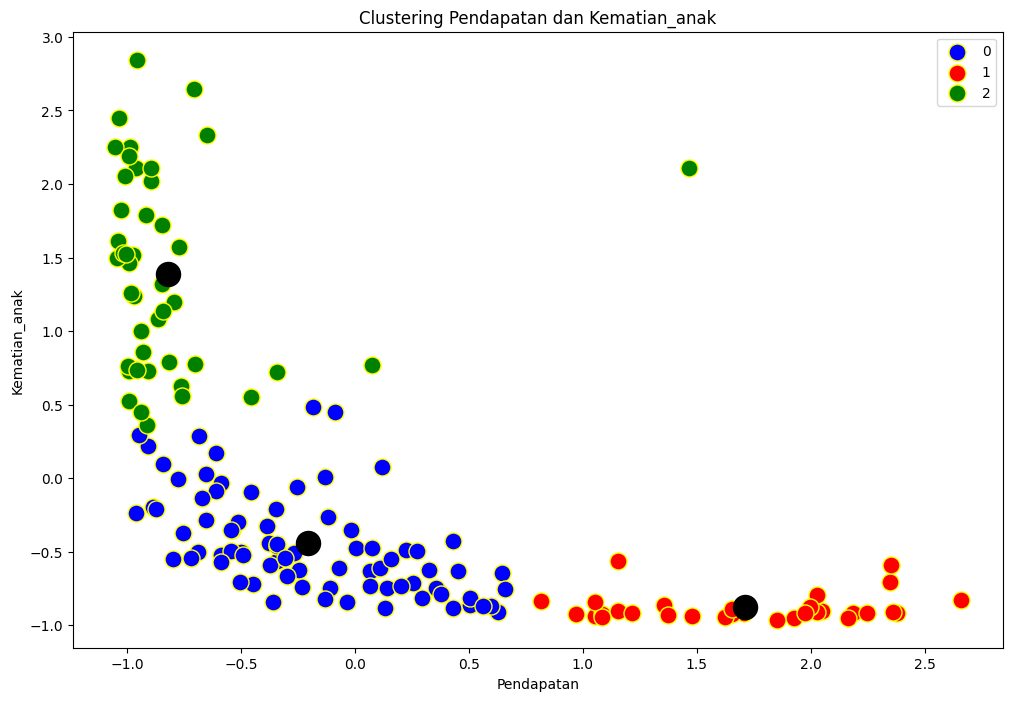

In [63]:
# Visualisasi Cluster k=3
plt.figure(figsize=(12,8))
plt.scatter(new_dfoutlier_std.Pendapatan[new_dfoutlier_std.label_kmeans2 == 0], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 0], c='blue', edgecolor='yellow', s=150, ls='-',label= 0)
plt.scatter(new_dfoutlier_std.Pendapatan[new_dfoutlier_std.label_kmeans2 == 1], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 1], c='red', edgecolor='yellow', s=150, ls='-',label= 1)
plt.scatter(new_dfoutlier_std.Pendapatan[new_dfoutlier_std.label_kmeans2 == 2], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 2], c='green', edgecolor='yellow', s=150, ls='-', label= 2)

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300)
plt.xlabel('Pendapatan')
plt.ylabel('Kematian_anak')
plt.title('Clustering Pendapatan dan Kematian_anak')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import silhouette_score

print('k = 2: ',silhouette_score(dfoutlier_std, labels =labels1))
print('k = 3: ',silhouette_score(dfoutlier_std, labels =labels2))

k = 2:  0.4860716545496431
k = 3:  0.5569354023241216


silhouette_score dari k=3 lebih besar dibandingkan dengan k=2, yang menunjukkan bahwa scatter plot dengan k=3 lebih mudah untuk dianalisa.

# CLUSTERING WITH REAL VALUE

In [65]:
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', random_state=42, n_init=10).fit(dfoutlier_std)
labels3 = kmeans3.labels_

In [66]:
newdf = pd.DataFrame(data = sc.inverse_transform(dfoutlier_std), columns= ['Pendapatan', 'Kematian_anak'])
newdf['label_kmeans3'] = labels3

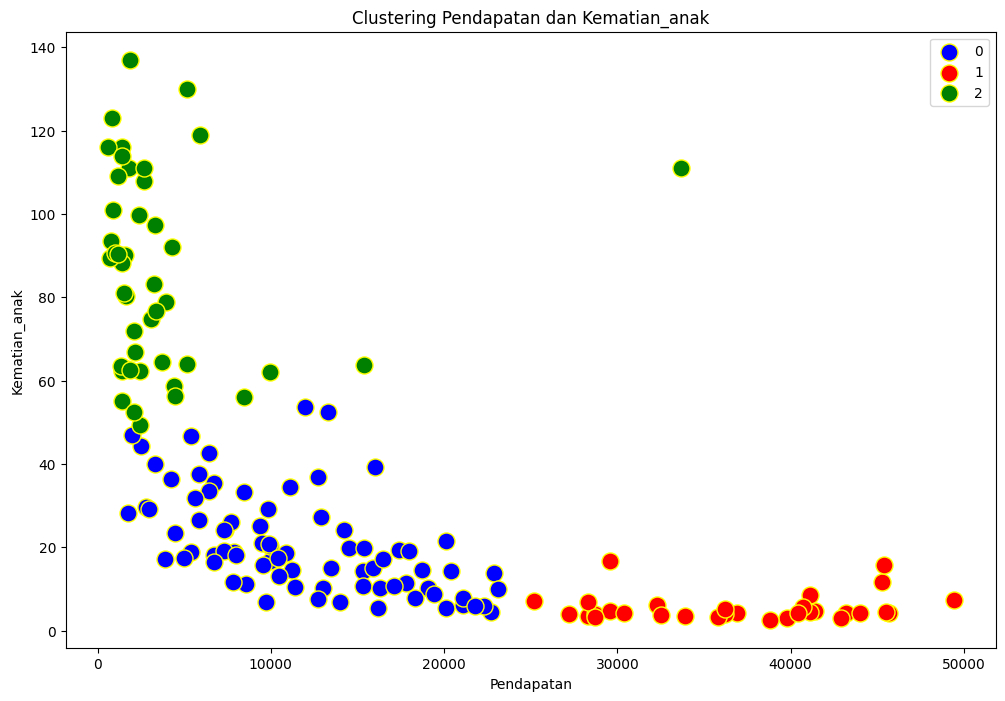

In [67]:
plt.figure(figsize=(12,8))
plt.scatter(newdf.Pendapatan[newdf.label_kmeans3 == 0], newdf['Kematian_anak'][newdf.label_kmeans3 == 0], c='blue', edgecolor='yellow', s=150, ls='-',label= 0)
plt.scatter(newdf.Pendapatan[newdf.label_kmeans3 == 1], newdf['Kematian_anak'][newdf.label_kmeans3 == 1], c='red', edgecolor='yellow', s=150, ls='-',label= 1)
plt.scatter(newdf.Pendapatan[newdf.label_kmeans3 == 2], newdf['Kematian_anak'][newdf.label_kmeans3 == 2], c='green', edgecolor='yellow', s=150, ls='-', label= 2)

plt.xlabel('Pendapatan')
plt.ylabel('Kematian_anak')
plt.title('Clustering Pendapatan dan Kematian_anak')
plt.legend()
plt.show()

In [68]:
# Menampilkan Data dengan Label_kmeans
df['label'] = pd.Series(labels3).astype('object')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,NaN
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,NaN
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,NaN
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,NaN


Pada dataframe diatas, terdapat penambahan kolom label. Akan dicari data negara terendah dengan label 1 (berwarna merah), karena memiliki pendapatan yang rendah tetapi memiliki tingkat kematian anak yang tinggi

In [69]:
df['Kematian_anak'].mean()

38.27005988023952

In [70]:
df['Pendapatan'].mean()

17144.688622754493

# RECOMMENDATION

In [71]:
# Mencari Negara dengan Pendapatan dan Kematian Anak Terendah
cari_negara = df[df['label']==2]

Karena CEO memiliki jumlah dana bantuan yang tidak begitu besar, maka akan dicari 5 negara dengan posisi terendah berdasarkan Pendapatan, dan 5 terendah berdasarkan Kematian_anak, untuk mempermudah CEO melakukan pembagian dana bantuan

In [72]:
# Mencari 5 Negara Terendah Berdasarkan Pendapatan
cari_negara.sort_values(by=['Pendapatan'],ascending=True)[:5]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,2
88,Liberia,89.3,19.1,11.80,92.6,700,5.47,60.8,5.02,327,2
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,2
93,Madagascar,62.2,25.0,3.77,43.0,1390,8.79,60.8,4.60,413,2


In [73]:
# Mencari 5 Negara Terendah Berdasarkan Kematian_anak
cari_negara.sort_values(by=['Kematian_anak'],ascending=False)[:5]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,2
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,2
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,2


Negara yang direkomendasikan kepada CEO untuk diberikan dana bantuan yaitu:
1. Congo, Dem. Rep dengan tingkat Kematian Anak: 116.0 dan tingkat Pendapatan: 609
2. Liberia dengan tingkat Kematian Anak: 89.3 dan tingkat Pendapatan: 700
3. Mozambique dengan tingkat Kematian Anak: 101.0 dan tingkat Pendapatan: 918
4. Sierra Leone dengan tingkat Kematian Anak: 160.0 dan tingkat Pendapatan: 1220
5. Madagascar dengan tingkat Kematian Anak: 62.2 dan tingkat Pendapatan: 1390
6. Angola dengan tingkat Kematian Anak: 116.0 dan tingkat Pendapatan: 1430
7. Burkina Faso	dengan tingkat Kematian Anak: 116.0 dan tingkat Pendapatan: 5900
8. Benin dengan tingkat Kematian Anak: 111.0 dan tingkat Pendapatan: 1820